In [1]:
import os
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from collections import defaultdict, OrderedDict
import shutil
from tqdm import tqdm

In [3]:
json_dir = os.path.join("/opt/ml/team_github/utils/crosswalk_filtering_noise_filtering.json")

with open(json_dir, "r", encoding="utf8") as outfile:
    datas = json.load(outfile)
    images = datas["images"]
    annotations = datas["annotations"]

img_df = pd.DataFrame(images)
annos_df = pd.DataFrame(annotations)

In [4]:
dirpath = '/opt/ml/data/segmentation/images/all'
annpath = '/opt/ml/data/segmentation/annotations/all'

198


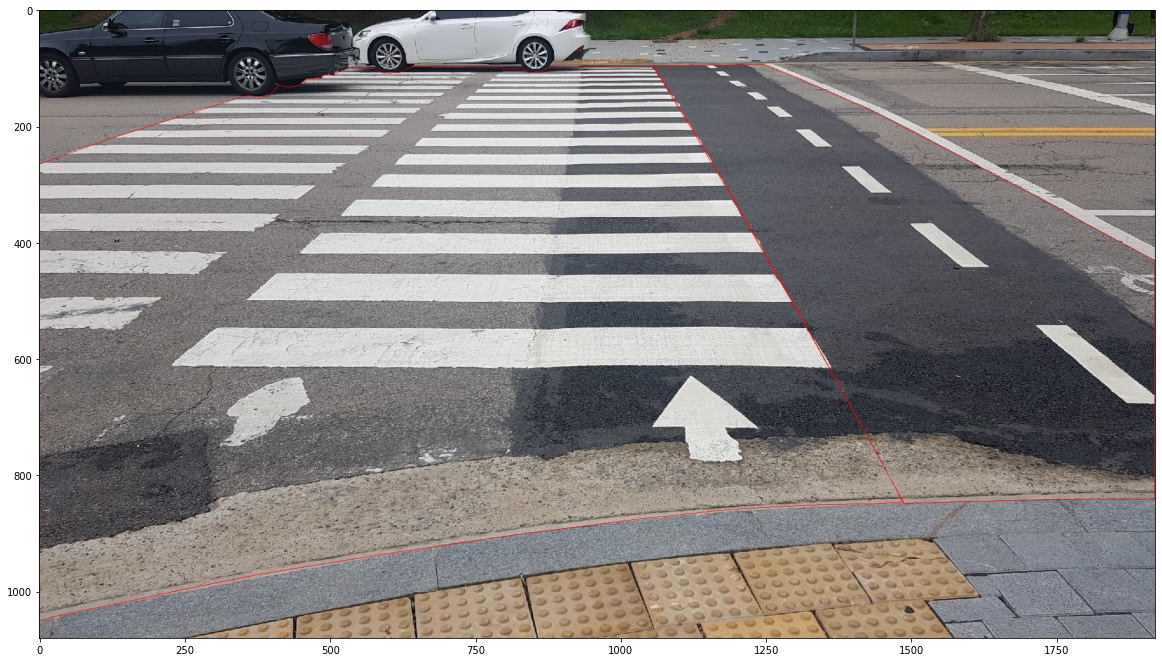

In [37]:
imageName = "MP_SEL_SUR_004678.jpg"
# imageName = "MP_SEL_SUR_000084.jpg"

print(img_df[img_df.file_name==imageName]['id'].item())

image_path = os.path.join(dirpath, imageName)
image =cv2.imread(image_path)
image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

ann_data = annos_df[annos_df.image_id==img_df[img_df.file_name==imageName]['id'].item()]['segmentation'].values
# print(len(ann_data[0][0]))
# print(ann_data[0][0])
all_coord=[]
for each_ann in ann_data:
    target = each_ann[0]
    coord = []
    for seg_idx in range(0, len(target), 2):
        x, y = target[seg_idx], target[seg_idx+1]
        # coord.append([x,y])
        image[x, y] = [255, 0, 0]

plt.figure(figsize=(20,16))
plt.imshow(image)

# output_path = os.path.join(annpath, imageName.split('.')[0] + ".png")
# cv2.imwrite(output_path, image)

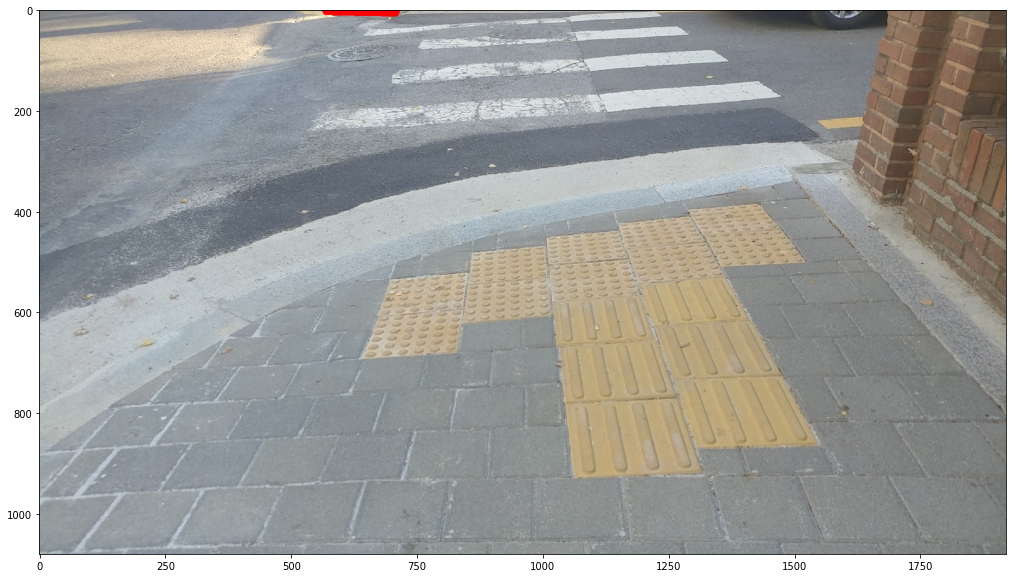

In [18]:
imageName = "MP_SEL_SUR_047089.jpg"
ann_data = [[568.50,0.00,568.00,4.70,598.50,5.80,708.78,7.40,711.70,3.30,693.22,3.22,687.75,0.00]]

image_path = os.path.join(dirpath, imageName)
image =cv2.imread(image_path)
image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

all_coord = []
fill_image = []
mask_image = np.zeros([image.shape[0], image.shape[1]])

for target in ann_data:
    target = list(map(int, target))

    coord = []
    for seg_idx in range(0, len(target), 2):
        x, y = target[seg_idx], target[seg_idx+1]
        coord.append([x, y])

    # image = cv2.fillPoly(image, [np.array(coord)], 255)
    np_coord = [np.array(coord)]
    np_coord
    image = cv2.polylines(image, np_coord, False, 255, 10)
plt.figure(figsize=(18, 10))
plt.imshow(image)